# CHAPTER 6. 게이트가 추가된 RNN

## ★★학습 목표★★
1. RNN의 한계 복습
 - 기울기 소실, 기울기 폭발 문제
2. RNN의 한계를 극복하기 위한 방법

 2-1. 기울기 폭발의 대책: 기울기 클리핑 기법

 2-2. 기울기 소실의 대책: LSTM, GRU

### 1. RNN 복습

사람들은 글을 읽을 때, 이 전 단어에 대한 이해를 기반으로 각 단어를 이해합니다.
전통적인 신경망은 이를 수행할 수 없으며, 이러한 단점으로 시계열 데이터를 처리하는데 어려움이 있었습니다. 이러한 단점을 해결하기 위한 모델이 이 전 시간에 공부한 RNN (Recurrent Neural Network) 입니다.

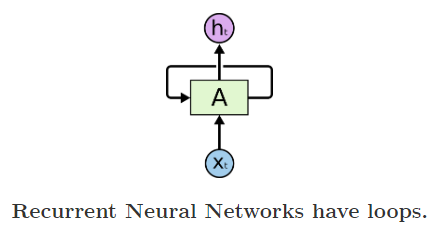

[그림1]

RNN은 위 그림과 순환하는 Network 구조를 갖고 있습니다.

위 그림을 살펴보면 신경망 A는 Xt를 입력 받아 ht를 출력합니다. 아울러 루프는 다음단계의 네트워크로 정보를 전달할 수 있게 합니다.

위 루프 구조를 풀어서 상호 연결된 순방향 신경망의 연속으로 변환하면 아래의 [그림2]와 같이 변경됩니다.

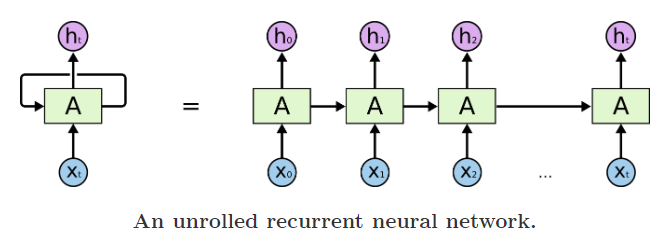

[그림2]

RNN의 구조를 보면 한 시점의 출력을 만들 때 이 전 시점의 신경망으로부터 정보를 전달 받아 시계열 데이터 분석을 가능하도록 했습니다. 하지만 RNN은 시퀀스의 길이가 길어질수록 먼 거리의 데이터를 잘 학습하지 못하는(장기 의존 관계를 학습하지 못하는) 단점이 있습니다. 이는 아래 [그림3]의 구조를 보면 알 수 있듯이 역전파 학습시 기울기는 'tanh', '+', 'Matmul(행렬곱)' 연산을 통과하는데 'tanh' 연산을 거듭할수록 기울기는 거듭 작아지게 되고, 'Matmul' 연산을 거듭할수록 거듭 커지게 됩니다. 즉, 시간을 거슬러 올라갈수록 기울기가 작아지거나(기울기 소실) 혹은 커지는(기울기 폭발), 둘 중 하나의 운명을 걷게 됩니다.  

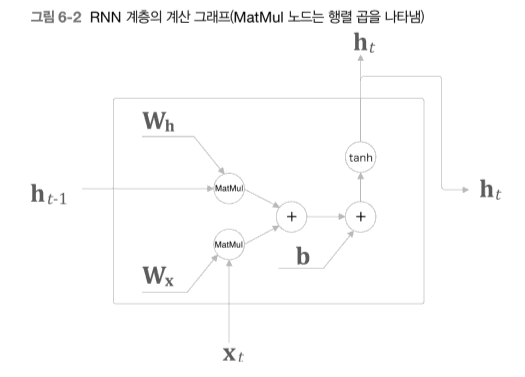

[그림3]

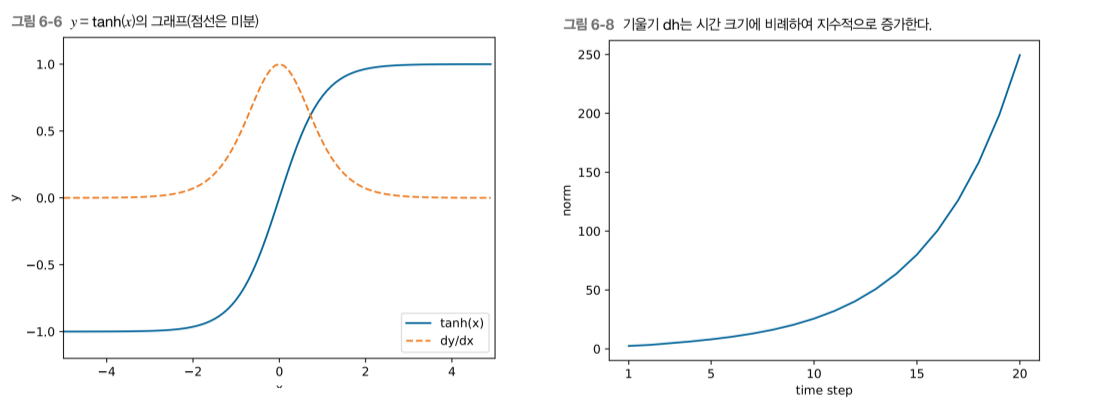
[그림4] tanh 미분 / matmul 미분

### 2. RNN의 한계를 극복하기 위한 방법

#### 2-1. 기울기 폭발 문제의 대책
기울기 클리핑 기법

기울기 클리핑 기법은 매우 단순한 알고리즘 입니다. 업데이트 해야하는 기울기 값이 설정한 임계값을 초과하면 (기울기가 과하다면) 기울기를 임의로 낮춰주는 방식입니다. 수식으로 살펴보면 아래 [그림5]와 같습니다.

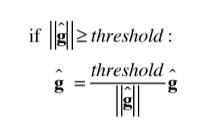

[그림5]

#### 2-2. 기울기 소실 문제의 대책 - LSTM

LSTM은 RNN의 한 종류로(파생?) 장기 의존성을 학습할 수 있는 네트워크 구조를 갖고 있습니다. LSTM은 1997년 소개된 알고리즘으로 다양한 문제에서 잘 작동하고 현재에도 시계열 데이터 문제에 널리 사용되고 있습니다.

LSTM의 아이디어는 단순합니다. RNN은 시간을 거듭할수록 장기기억을 잘 전달하지 못하는데 이를 잘 전달하수있는 전담 게이트를 추가하여 장기기억 손실을 없애는 방식입니다.

아래 [그림6]의 RNN 네트워크와 LSTM네트워크 도식을 보면 구조적으로 가장 큰 차이는 별표 박스 부분입니다. (물론 계산 과정도 더 복잡해졌습니다만.....)

지금 부터는 LSTM의 구조를 하나하나 차근차근 분석해보도록 하겠습니다.

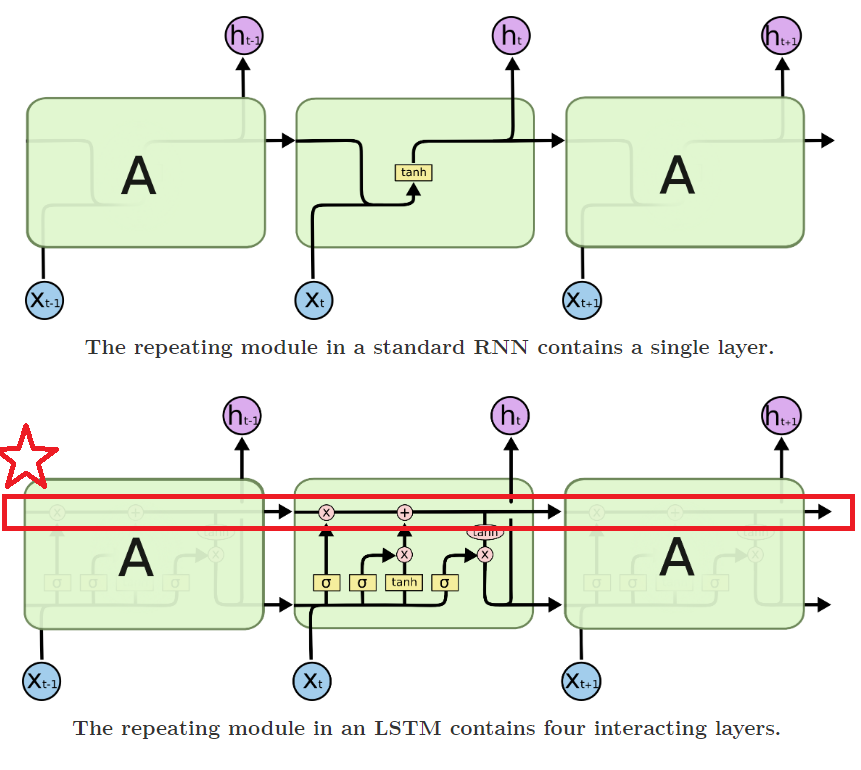

[그림6]

LSTM의 핵심 아이디어는 cell state라고 불리우는 [그림7] LSTM 네트워크 도식의 상단을 가로지르는 수평선입니다.

cell state는 컨베이어에 비유할 수 있으며 전체 체인을 따라 진행하며, 약간의 선형 상호작용만 발생하여 정보의 유실이 거의 없이 그대로 흐르기에 용이한 구조를 갖고 있습니다. 뿐만아니라 LSTM은 게이트라는 sigmoid 계층과 점별 곱셈 연산으로 이루어진 구조를 통해 cell state에 정보를 추가하거나 제거하는 기능도 갖고 있습니다.
(sigmoid 연산은 0과 1사이의 값을 출력하며, 게이트에서 0의 값은 "해당 값은 cell state에 정보를 추가하지 말아라"라는 의미를, 1의 값은 "해당 값은 cell state에 정보를 모두 전달하라"라는 의미를 내포합니다.)

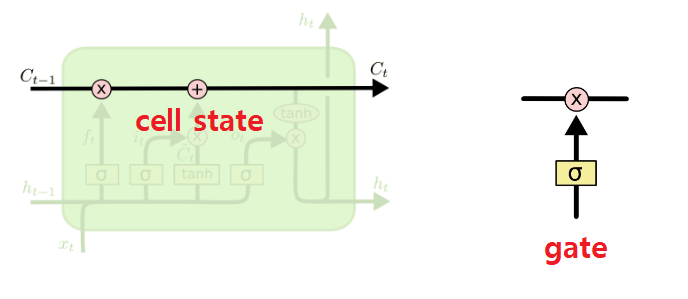

[그림 7]

LSTM의 첫 단계는 cell state에 어떤 정보를 삭제할지 결정하는 것입니다. 이 단계를 "forget gate layer"라는 시그모이드 계층에서 담당하게 됩니다. 이 계층은 ht-1과 xt를 입력으로 받아 시그모이드 계층을 통과하며 0과 1의 결과를 전달합니다. 이 후, 이 전 시점의 cell state의 값 Ct-1의 각 요소에 대해 곱을 진행하게 되며 이 과정에서 0과 곱해지는 데이터는 정보값을 삭제하는 의미를, 1과 곱해지는 데이터는 정보값을 보존하는 의미를 갖게 됩니다.

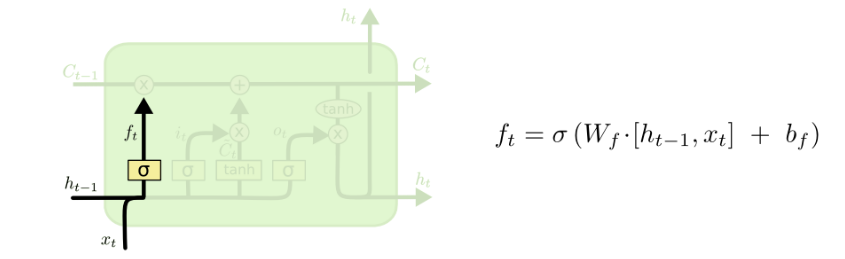

[그림 8]

LSTM의 두번째 단계는 cell state에 어떤 새 정보를 저장할지 결정하는 것입니다. 이 부분은 두 부분으로 이루어져 있습니다. 먼저 "input gate layer"라는 시그모이드 계층이 앞서 살펴본 "forget gate layer"와 마찬가지의 방법으로 어떤 값들을 업데이트 할 지 결정합니다. 그 다음 tanh 계층이 업데이트 될 후보 값들의 벡터 Ct를 만듭니다. 다음 단계에서 이 두 부분을 합쳐 상태를 업데이트 합니다.

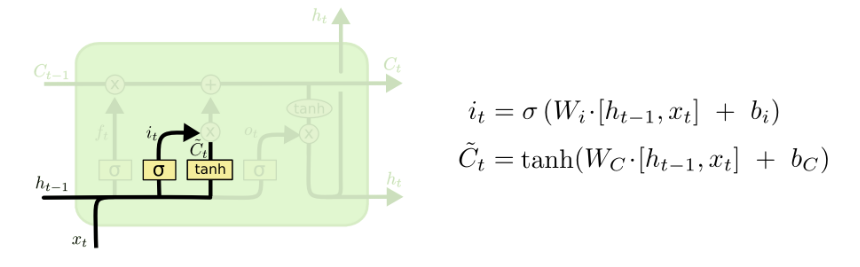

[그림 9]

위 단계를 통해서 이전 cell state (Ct-1)에서 다음 cell state (Ct)로 업데이트 할 준비를 마쳤습니다. forget gate의 결과 값(sigmoid를 통과한 값, ft)과의 곱을 통해 Ct-1에서 제거할 값을 제거합니다. 그 다음 input gate의 결과 값(it)와 후보 벡터 Ct^의 곱 결과를 Ct-1에 더해주어 다음 cell state(Ct)로 업데이트 해줍니다.

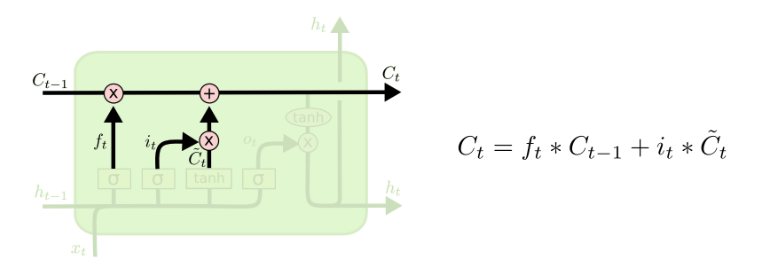

[그림 10]

마지막으로 ht를 계산하면 됩니다.
먼저 ht-1과 xt의 입력을 sigmoid 계층을 통과를 통해 어떤 부분을 출력할 것인지 결정합니다. 그 다음 Ct를 tanh를 통해 값이 -1과 1사이가 되게 하고, 시그모이드 게이트의 출력과 곱하면서 값이 걸러지고 은닉 상태가 되고, 해당 ht 값으로 예측 결과 yt를 출력 하게 됩니다.

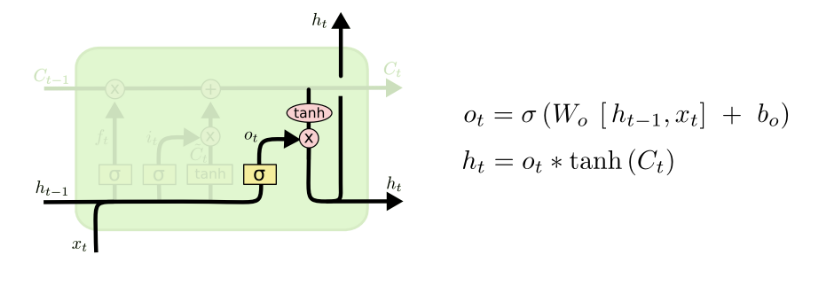

[그림 11]

LSTM은 계층을 쌓거나 드롭아웃 기법들을 활용해 다양한 변형을 가지고 있습니다.


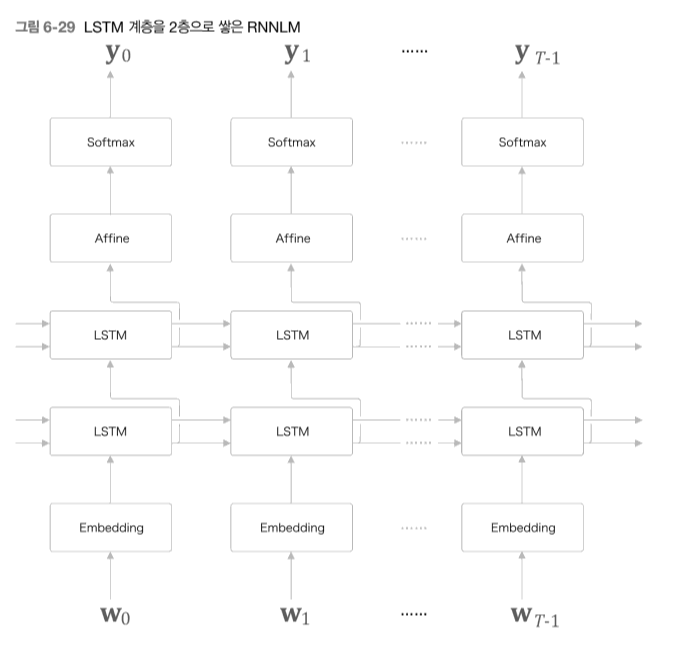

[그림 12]

[그림 12]는 LSTM 계층을 두 개 쌓은 모습으로 첫 번째 LSTM 계층의 은닉 상태가 두 번째 LSTM 계층에 입력되는 방식으로 계층을 쌓는 기법입니다. 이를 통해 더 복잡한 패턴을 학습할 수 있습니다.

일반적으로 처리할 문제의 복잡도나 준비된 학습 데이터의 양에 따라 계층의 층 수를 정하며 책에서는 구글 번역에서 사용하는 GNMT모델은 LSTM을 8층 쌓은 신경망이라고 얘기하고 있습니다. 처리할 문제가 복잡하고 학습 데이터를 대량으로 준비할 수 있다면 LSTM 계층을 깊게 쌓는 것이 정확도를 향상 시키는 방법일 수 있습니다.

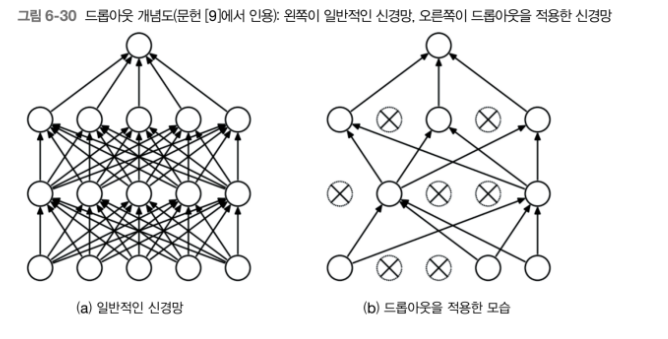

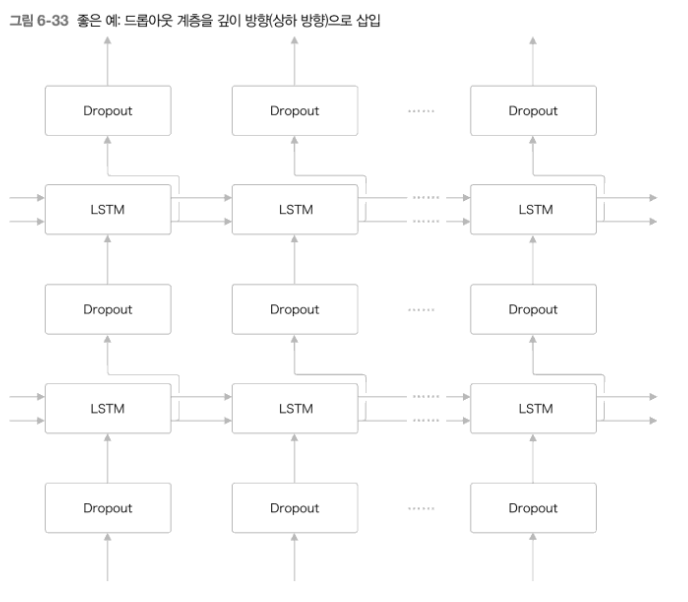

[그림 13]

RNN기반의 모델은 일반적인 피드포워드 신경망보다 쉽게 과적합을 일으킵니다. 따라서 RNN의 과적합 대책은 중요하고 이를 해결하기 위해 드롭아웃 기법을 자주 사용합니다.

드롭아웃은 무작위로 뉴런을 선택하여 선택한 뉴런을 무시하는 기법입니다. 위 [그림 13]은 LSTM에 드롭아웃 기법을 적용한 아키텍처를 보여줍니다.

#### 2-2. 기울기 소실 문제의 대책 - GRU(Gated Recurrent Unit)

LSTM은 RNN의 한계였던 'Long-term dependency' 문제를 해결하면서 긴 시퀀스의 데이터에서도 좋은 성능을 내는 모델이 되었지만, 복잡한 구조 때문에 RNN에 비해 Parameter를 많이 필요하게 되었습니다.

많은 parameter는 필연적으로 많은 연산량을 동반하며, 데이터가 충분하지 않은 경우 오버피팅이 발생하게 되는데, 이러한 LSTM의 단점을 개선하기 위해 LSTM의 변형인 GRU가 등장하게 되었습니다.



GRU의 핵심 개념은 아래 두가지 입니다.

(1) LSTM의 forget gate와 input gate를 통합하여 하나의 'update gate'를 만든다.

(2) cell state와 hidden state를 통합한다.

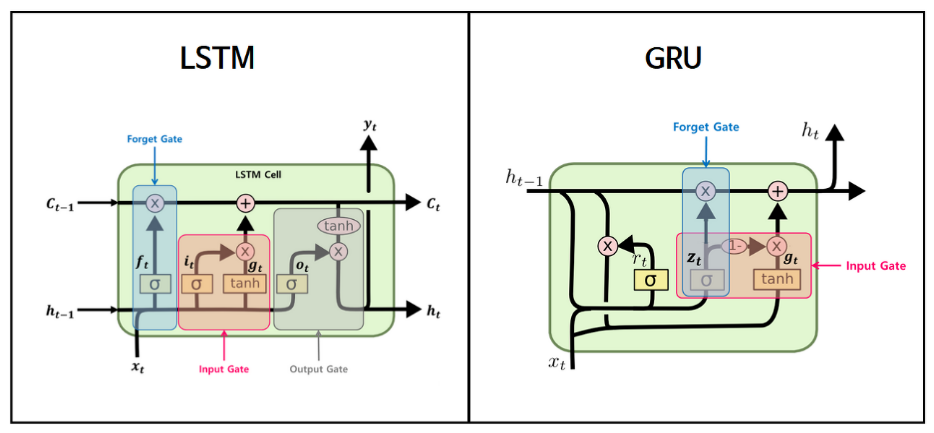

[그림 14]

GRU의 진행 단계 1. Gate

[1] Reset Gate, r(t): 이전 정보를 얼마나 잊어야 하는지를 결정합니다.

[2] Update Gate, z(t): 이전 정보를 얼마나 유지 시킬지를 결정합니다.

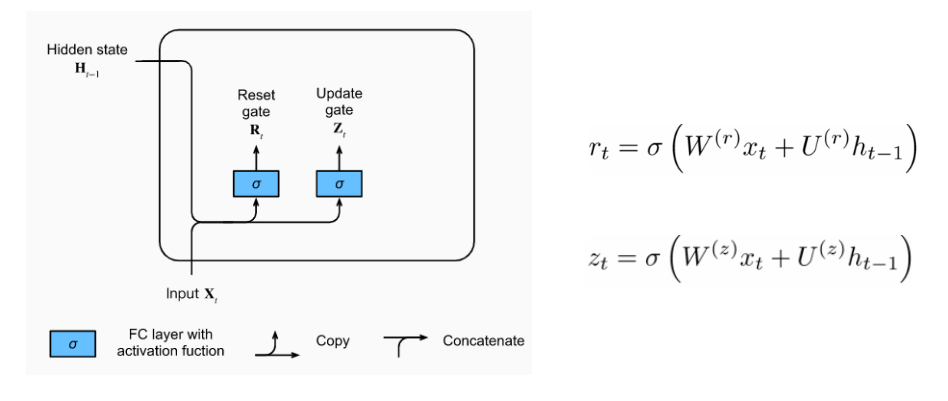

[그림 15]

GRU의 진행 단계 2. hidden state의 후보군

hidden layer의 후보(candidate)를 구하는 단계로 reset gate인 r(t)와 Uh(t-1)을 곱하여, 이 전 타임 스텝에서 무엇을 지워야할지를 결정합니다.

※ update gate를 거치지 않았기 때문에 아직까지는 candidate hidden state 입니다.

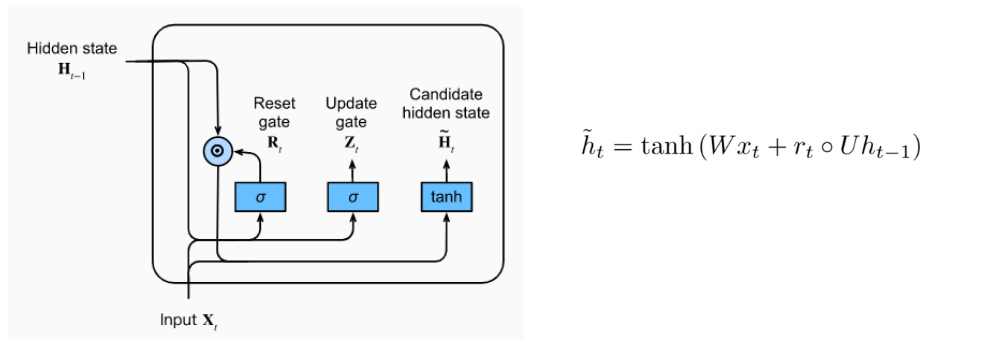

[그림 16]

update gate는 얼마나 새로운 hidden state h(t)가 이전 hidden state h(t-1)과 같을지 아니면 새로운 candidate hidden state가 많이 사용될지를 결정합니다.

z(t)가 0 이라면 old state; h(t-1)을 많이 유지하고, 1이라면 candidate hidden state; h(t)^으로 완전히 대체됩니다.

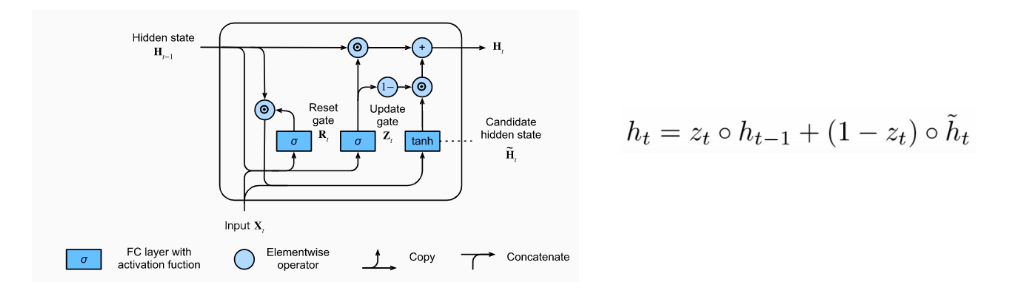

[그림 17]